# 6장 : 텍스트와 시퀀스를 위한 딥러닝 *Part 1*

#### 구성
* 텍스트 데이터 다루기
* 순환 신경망 이해하기
* 순환 신경망의 고급 사용법
* 컨브넷을 이용한 시퀀스 처리



#### 이 장에서 다룰 핵심 내용 
* 텍스트 데이터를 유용한 형태로 전처리 하는 방법
* 순환신경망을 사용하는 방법
* 1D 컨브넷을 사용한 데이터 처리

---



*텍스트 (단어의 시퀀스 또는 문자의 시퀀스), 시계열 또는 일반적인 시퀀스 데이터를 처리할 수 있는 딥러닝 모델, **순환 신경망(recurrent neural network)**, **1D 컨브넷 (1D Convnet)** 을 살펴보겠습니다.*
* 문서 분류나 시계열 분류
* 시계열 비교
* 시퀀스-투-시퀀스 학습 (ex. 영어 문장을 프랑스 어로 변환하기)
* 감성 분석 (트윗이나 영화 리뷰가 긍정적인지 부정적인지 분류하기)
* 시계열 예측 (최근 날씨 데이터가 주어졌을 때 향후 날씨를 예측하기)

## 6.1 텍스트 데이터 다루기

텍스트는 가장 흔한 시퀀스 형태의 데이터이다. 보통 단어 수준으로 작업하는 경우가 많다. 딥러닝 모델은 수치형 텐서만 다룰 수 있으므로, 텍스트를 수치형 텐서로 변환하는 **텍스트 벡터화** 과정을 거쳐야 합니다. 이에는 여러가지 방식이 있습니다. 
* 텍스트를 단어로 나누고 각 단어를 하나의 벡터로 변환합니다.
* 텍스트를 문자로 나누고 각 문자를 하나의 벡터로 변환합니다.
* 텍스트에서 단어나 문자의 n-gram을 추출하여 각 n-gram을 하나의 벡터로 변환합니다. n-gram은 연속된 단어나 문자의 그룹으로 텍스트에서 단어나 문자를 하나씩 이동하면서 추출합니다.

토큰(token) : 텍스트를 나누는 단위 (단어, 문자, n-gram), 그리고 텍스트를 토큰으로 나누는 작업을 토큰화(tokenization)이라고 합니다.

토큰과 벡터를 연결하는 방법은 여러가지가 있습니다.
* 원-핫 인코딩 (One-hot encoding)
* 토큰 임베딩 (Token embedding)


### n-gram & BoW
BoW가 **순서가 없는** 토큰화 방법이기 때문에 딥러닝 모델보다 얕은 학습방법의 언어 처리모델에 사용되는 경향이 있습니다. 시퀀스가 아니라 집합으로 간주되고 문장의 일반적인 구조가 사라지기 때문입니다. n-gram을 추출하는 것은 일종의 특성 공학 입니다. 딥러닝은 유연하지 못하고 불안정한 이런 방식을 계층적인 특성학습으로 대체합니다. (n-gram은 로지스틱 회기나 랜덤포레스트같은 얕은 학습방법의 텍스트 처리 모델을 사용할 때 강력하고 아주 유용한 특성 공학 입니다.)


`The cat sat on the mat`


* bag of 2-gram

`{"The", "The cat", "cat", "cat sat", "sat", "sat on", "on", "on the", "the", "the mat", "mat"}`


* bag of 3-gram

`{"The", "The cat", "cat", "cat sat", "The cat sat", "sat", "sat on", "on", "cat sat on", "on the", "the", "sat on the", "the mat", "mat", "on the mat"}`


### 단어와 문자의 원-핫 인코딩

In [5]:
import numpy as np

samples = ['The cat sat on the mat.', 'The dog ate my homework.']

token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
            
max_length = 10

results = np.zeros(shape=(len(samples), max_length, max(token_index.values()) + 1))

for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = token_index.get(word)
        results[i, j, index] = 1
        
print(results)

[[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]]


In [8]:
import string

characters = string.printable
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 50
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample):
        index = token_index.get(character)
        results[i, j, index] = 1

print(results)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


케라스에는 원본 텍스트 데이터를 단어 또는 문자 수준의 원-핫 인코딩으로 변환해 주는 유틸리티가 있습니다. 특수 문자를 제거하거나 빈도가 높은 N개의 단어만 선택하는 등 여러가지 중요한 기능들이 있기 때문에 이 유틸리티를 사용하는 것이 좋습니다.

In [11]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(num_words = 1000)
tokenizer.fit_on_texts(samples)

sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode='binary')
word_index = tokenizer.word_index
print(len(word_index))

9


원-핫 인코딩의 변종 중 하나는 **원-핫 해싱(One-hot Hashing)** 기법입니다. 이 방식은 어휘 사전에 있는 고유한 토큰의 수가 너무 커서 모두 다루기 어려울 때 사용합니다. 각 단어에 명시적으로 인덱스를 할당하고 이 인덱스를 딕셔너리에 저장하는 대신에 단어를 해싱하여 고정된 크기의 벡터로 변환합니다. 일반적으로 간단한 해싱 함수를 사용합니다. 이 방식의 주요 장점은 명시적인 단어 인덱스가 필요없기 때문에 메모리를 절약하고 온라인 방식으로 데이터를 인코딩할 수 있습니다. (**전체 데이터를 확인하지 않고 토큰을 생성할 수 있습니다.**) 

한 가지 단점은 해시 충돌(Hash Collision) 입니다. 2개의 단어가 같은 해시를 만들면 이를 바라보는 머신 러닝 모델은 단어 사이의 차이를 인식 하지 못합니다. 해싱 공간의 차원이 해싱될 고유 토큰의 전체 개수보다 훨씬 크면 해싱 출돌의 가능성이 줄어듭니다.

In [14]:
dimensionality = 1000
max_length     = 10

results = np.zeros((len(samples), max_length, dimensionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimensionality
        results[i, j, index] = 1
print(results)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


### 단어 임베딩 사용하기

단어와 벡터를 연관짓는 강력하고 인기있는 또 다른 방법은 **단어 임베딩** 이라는 밀집 단어 벡터를 사용하는 것 입니다. 원-핫 인코딩으로 만든 벡터는 *희소(Sparse)하고 (대부분 0 으로 체워짐) 고차원입니다. (어휘 사전에 있는 단어의 수와 차원이 같습니다.)* 반면 단어 임베딩은 **저차원의 실수형 벡터** 입니다. (희소 베터의 반대인 밀집 벡터) 단어 임베딩은 데이터로부터 학습됩니다. 보통 `256`차원, `512`차원 또는 큰 어휘사전을 다룰 때는 `1024` 차원의 단어 임베딩을 사용합니다. 반면에 원-핫 인코딩은 (2만 개의 토큰으로 이루어진 어휘 사전을 만드려면) `20,000`차원 또는 그 이상의 벡터일 경우가 많습니다. 따라서 단어 임베딩이 더 많은 정보를 적은 차원에 저장하빈다.

* (문서 분류나 감성 예측 같은) 관심 대상인 문제와 함께 단어 임베딩을 학습합니다. 이런 경우에는 랜덤한 단어 벡터로 시작해서 신경망의 가중치를 학습하는 것과 같은 방식으로 벡터를 학습합니다.
* 풀려는 문제가 아니고 다른 머신 러닝 작업에서 미리 계산된 단어 임베딩을 로드합니다. 이를 **사전 훈련된 단어 임베딩** 이라고 합니다.


#### embedding 층을 사용하여 단어 임베딩 학습하기
단어와 밀집 벡터를 연관 짓는 가장 간단한 방법은 렌덤하게 벡터를 선택하는 것 입니다. 이 방법은 임베딩 공간이 구조적이 않다는 것, accurate와 exact라는 단어는 대부분 문장에서 비슷한 의미로 사용되지만 완전히 다른 임베딩을 가지는데, 심층 신경망이 이런 임의의 구조적이지 않은 임베딩 공간을 이해하기는 어렵습니다.

단어 벡터사이에 **좀 더 추상적이고 기하학적인 관계를 얻으려면** 단어사이에 있는 의미 관계를 반영해야 합니다. 단어 임베딩은 언어를 기하학적 공간에 매핑하는 것입니다.

실제 단어 임베딩 공간에서 의미있는 기하학적 변환의 일반적인 예는 `gender` 벡터와 `plural` 벡터입니다. 그러나 특정 의미 관계의 중요성이 작업에 따라 다르기 때문에, 새로운 작업에는 새로운 임베딩을 학습하는 것이 타당합니다. 다행이 역전파를 사용하여 쉽게 만들 수 있고 케라스를 이용하면 더 쉽습니다. Embedding층의 가중치 학습하면 됩니다.

In [4]:
from keras.layers import Embedding

embedding_layer = Embedding(1000, 64)
# Embedding 층은 적어도 2개의 매개변수를 받습니다. 
#### 가능한 토큰의 개수(여기서는 1000으로 단어 인덱스 최댓값 + 1)
#### 임베딩 차원 64

Embedding층을 *정수 인덱스를 밀집 벡터로 매핑하는 딕셔너리로 이해하는 것*이 가장 좋습니다. 정수를 입력받아 내부 딕셔너리에서 이 정수에 연관된 벡터를 찾아 반환합니다. 딕셔너리 탐색은 효율적으로 수행해 냅니다.

**단어 인덱스** &rightarrow; **임베딩 층** &rightarrow; **연관된 단어 벡터** 

임베딩 층은 2D 정수 텐서를 입력으로 받습니다. (각 샘플은 정수의 시퀀스 입니다.) `(32, 10)` 크기의 배치 (길이 10인 시퀀스의 32개로 이루어진 배치)나 `(64, 15)` 크기의 배치 (길이가 15인 시퀀스 64개로 이루어진 배치)를 주입할 수 있습니다. 배치에 있는 모든 시퀀스는 길이가 같아야 하므로 (하나의 텐서에 담아야 하기 때문에) 작은 길이의 시퀀스는 0으로 패딩되고 길이가 더 긴 시퀀스는 잘립니다.

임베딩 층은 크기가 `(samples, sequence_length, embedding_dimensionality)` 인 3D 실수형 데이터를 반환합니다. 일너 3D텐서는 RNN 층이나 1D 합성곱 층에서 처리됩니다. 임베딩 층의 객체를 생성할 때 가중치는 다른 층과 마찬가지로 랜덤하게 초기화됩니다. 훈련을 하면서 이 단어 벡터는 역전파를 통해 점차 조정이 되어 이어지는 모델이 사용할 수 있더ㅗ록 임베딩 공간을 구성합니다. 훈련이 끝나면 임베딩 공간은 특정 문제에 특화된 구조를 가지게 됩니다.


In [1]:
from keras.datasets import imdb
from keras import preprocessing


max_features = 10000    # 특성으로 사용될 단어의 수
maxlen       = 20       # 사용할 텍스트의 길이, 가장 빈번한 max_features개의 단어만 사용합니다.

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = max_features)

x_train = preprocessing.sequence.pad_sequences(x_train, maxlen = maxlen)    # 리스트를 (sample, maxlen) 크기의 2D 정수 텐서로 변환합니다.
x_test  = preprocessing.sequence.pad_sequences(x_test,  maxlen = maxlen)

Using TensorFlow backend.


In [3]:
from keras.models import Sequential
from keras.layers import Flatten, Dense, Embedding

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen))   # 나중에 임베딩된 입력을 Flatten층에서 펼치기 위해 Embedding층에input_length를 지정합니다. Embedding층의 출력크기는 (samples, maxlen, 8)이 됩니다.

model.add(Flatten())                                    # 3D 임베딩 텐서를 (samples, maxlen * 8) 크기의 2D 텐서로 펼칩니다.

model.add(Dense(1, activation = 'sigmoid'))             # 분류기를 추가합니다.
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

history = model.fit(x_train, y_train, epochs = 10, batch_size = 32, validation_split = 0.2)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 8)             80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 160)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 1s 54us/step - loss: 0.6638 - acc: 0.6327 - val_loss: 0.6062 - val_acc: 0.7052
Epoch 2/10
20000/20000 [==============================] - 1s 37us/step - loss: 0.5331 - acc: 0.7536 - val_loss: 0.5204 - val_acc: 0.7326
Epoch 3/10
20000/20000 [==============================] - 1s 42us/step - loss: 

### 사전 훈련된 단어 임베딩 사용하기

훈련데이터가 부족하면 작업에 맞는 당너 임베딩을 학습할 수 없습니다. 이때는 풀려는 문제와 함께 임베딩을 학습한느 대신에 미리 계산된 임베딩 공간에서 임베딩 벡터를 로드할 수 있습니다. 이런 임베딩 공간은 **뛰어난 구조와 유용한 성질을 가지고 있어 언어 구조의 일반적인 측면을 잡아낼 수 있습니다.**  자연어 처리에서 사전 훈련된 단어 임베딩을 사용하는 이유는 이미지 분류 문제에서 사전 훈련된 컨브넷을 사용하는 이유와 거의 동일합니다. 충분한 데이터가 없어서 자신만의 좋은 특성을 학습하지 못하지만 꽤 일반적인 특성이 필요할 때입니다. 이런 경우에는 다른 문제에서 학습한 특성을 재사용하는 것이 합리적입니다.

단어 임베딩은 일반적으로 단어 출현 통계를 사용하여 계산됩니다. 여기에는 신경망을 사용하는 기법도, 아닌 기법도 있습니다. **word2vec**은 가장 유명하고 성공한 단어 임베딩 방법입니다. Word2vec의 차원은 성별처럼 구체적인 의미가 있는 속성을 잡아냅니다.

인기있는 또 다른 하나는 **GloVe**입니다. 이 임베딩 기법은 단어의 동시 출현 통계를 기록한 행렬을 분해하는 기법을 사용하빈다. 이 개발자들은 위키피디아 데이터와 커먼 크롤 데이터에서 가져온 수백만개의 영어 토큰에 대해서 임베딩을 미리 계산해놓았습니다.

In [1]:
import os

imdb_dir  = './datasets/aclImdb'
train_dir = os.path.join(imdb_dir, 'train')
labels    = []     # 긍정 또는 부정 
texts     = []

for label_type in ['neg', 'pos']:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == '.txt':
            f = open(os.path.join(dir_name, fname), encoding = 'utf8')
            texts.append(f.read())
            f.close()
            if label_type == 'neg':
                labels.append(0)
            else:
                labels.append(1)

In [2]:
### tokenize data

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

import numpy as np

maxlen             = 100     # 100개 단어 이후는 버립니다.
training_samples   = 200     # 훈련 샘플은 200개입니다.
validation_samples = 10000   # 검증 샘플은 1만개입니다.
max_words          = 10000   # 데이터셋에서 가장 빈도 높은 1만개의 단어만 사용합니다.

tokenizer = Tokenizer(num_words = max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

word_index = tokenizer.word_index
print('%s개의 고유한 토큰을 찾았습니다.' % len(word_index))

data    = pad_sequences(sequences, maxlen = maxlen)
labels  = np.asarray(labels)
print('데이터 텐서의 크기 :', data.shape )
print('레이블 텐서의 크기 :', labels.shape )

indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data    = data[indices]
labels  = labels[indices]

x_train = data[:training_samples]
y_train = labels[:training_samples]
x_val   = data[training_samples:   training_samples + validation_samples]
y_val   = labels[training_samples: training_samples + validation_samples]

Using TensorFlow backend.


88582개의 고유한 토큰을 찾았습니다.
데이터 텐서의 크기 : (25000, 100)
레이블 텐서의 크기 : (25000,)


In [3]:
glove_dir = './datasets/'

embeddings_index = {}
f = open(os.path.join(glove_dir, 'glove.6B.100d.txt'), encoding = 'utf8')
for line in f:
    values = line.split()
    word   = values[0]
    coefs  = np.asarray(values[1:], dtype = 'float32')
    embeddings_index[word] =coefs
f.close

<function TextIOWrapper.close()>

In [4]:
embedding_dim = 100


embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

In [5]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model.add(Flatten())
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1,  activation = 'sigmoid'))
model.summary

<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7f8e5ea98c18>>

In [6]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = False

In [7]:
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 10, batch_size  =32, validation_data = (x_val, y_val))
model.save_weights('pre_trained_glove_model.h5')

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 0s 2ms/step - loss: 2.1531 - acc: 0.4800 - val_loss: 0.6929 - val_acc: 0.5086
Epoch 2/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6413 - acc: 0.6450 - val_loss: 0.7114 - val_acc: 0.5127
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5153 - acc: 0.8200 - val_loss: 1.0803 - val_acc: 0.5020
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5224 - acc: 0.7600 - val_loss: 0.6835 - val_acc: 0.5651
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3390 - acc: 0.9300 - val_loss: 0.6892 - val_acc: 0.5489
Epoch 6/10
200/200 [==============================] - 1s 4ms/step - loss: 0.2809 - acc: 0.9950 - val_loss: 0.8081 - val_acc: 0.5073
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.3162 - acc: 0.8700 - val_loss: 0.7185 - val_acc: 0.5594
Epoch 8/10
200/200 [========

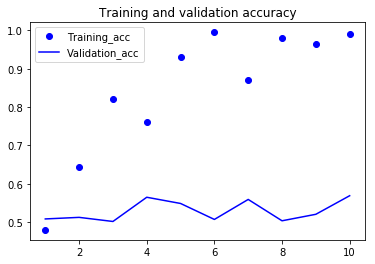

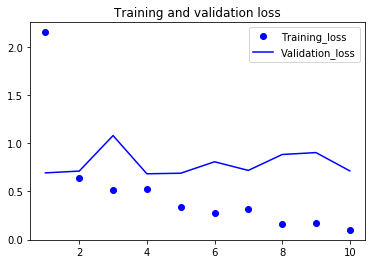

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

acc      = history.history['acc']
val_acc  = history.history['val_acc']
loss     = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc,      'bo', label = 'Training_acc')
plt.plot(epochs, val_acc,  'b',  label = 'Validation_acc')

plt.title('Training and validation accuracy')
plt.legend()


plt.figure()
plt.plot(epochs, loss,     'bo', label = 'Training_loss')
plt.plot(epochs, val_loss, 'b',  label = 'Validation_loss')

plt.title('Training and validation loss')
plt.legend()
#plt.show()

이 모델은 과대적합이 빠르게 시작됩니다. 훈련 샘플 수가 작기 때문에 놀라운 일은 아닙니다. 같은 이유로 검증 정확도와 훈련 정확도 사이에 차이가 큽니다. 검증 정확도는 50% 후반을 달성한 것 같습니다. 훈련 샘플 수가 적기 때문에 어떤 샘플 200개를 선택했는 지에 따라 성능이 크게 좌우됩니다. 여기서는 샘플들을 랜덤하게 선택했습니다. 선택한 샘플에서 성능이 나쁘면 예제를 위해서 랜덤하게 200개의 샘플을 다시 추출하면 됩니다. (실전에서는 훈련데이터를 고르지는 않습니다.)

사전 훈련된 단어 임베딩을 사용하지 않거나 임베딩 층을 동결하지 않고 같은 모델을 훈련할 수 있습니다. 이런 경우 해당 작업에 특화된 입력 토큰의 임베딩을 학습할 것입니다. 데이터가 풍부하게 있다면 사전 훈련된 단어 임베딩보다 일반적으로 훨씬 성능이 높습니다.

In [16]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model2 = Sequential()
model2.add(Embedding(max_words, embedding_dim, input_length = maxlen))
model2.add(Flatten())
model2.add(Dense(32, activation = 'relu'))
model2.add(Dense(1,  activation = 'sigmoid'))
model2.summary

model2.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
history = model2.fit(x_train, y_train, epochs = 10, batch_size  =32, validation_data = (x_val, y_val))

Train on 200 samples, validate on 10000 samples
Epoch 1/10
200/200 [==============================] - 1s 3ms/step - loss: 0.6924 - acc: 0.5600 - val_loss: 0.6925 - val_acc: 0.5217
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.5010 - acc: 0.9700 - val_loss: 0.7029 - val_acc: 0.5220
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.2827 - acc: 0.9750 - val_loss: 0.6974 - val_acc: 0.5171
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 0.1247 - acc: 1.0000 - val_loss: 0.7015 - val_acc: 0.5235
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0607 - acc: 1.0000 - val_loss: 0.7102 - val_acc: 0.5248
Epoch 6/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0314 - acc: 1.0000 - val_loss: 0.7118 - val_acc: 0.5261
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0173 - acc: 1.0000 - val_loss: 0.7124 - val_acc: 0.5309
Epoch 8/10
200/200 [========

**적은 수의 훈련 샘플로 작업하는 것은 어려운 일입니다.**